Found 16000 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.
Found 10 classes: ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09']
Epoch 1/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.1758 - loss: 2.1832

500/500 ━━━━━━━━━━━━━━━━━━━━ 121s 240ms/step - accuracy: 0.1760 - loss: 2.1828 - val_accuracy: 0.4227 - val_loss: 1.7507
Epoch 2/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.5505 - loss: 1.2429

500/500 ━━━━━━━━━━━━━━━━━━━━ 70s 140ms/step - accuracy: 0.5506 - loss: 1.2425 - val_accuracy: 0.6532 - val_loss: 0.9960
Epoch 3/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.7415 - loss: 0.7059

500/500 ━━━━━━━━━━━━━━━━━━━━ 70s 140ms/step - accuracy: 0.7416 - loss: 0.7058 - val_accuracy: 0.6817 - val_loss: 1.0503
Epoch 4/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.8244 - loss: 0.4886

500/500 ━━━━━━━━━━━━━━━━━━━━ 70s 140ms/step - accuracy: 0.8244 - loss: 0.4885 - val_accuracy: 0.8138 - val_loss: 0.6619
Epoch 5/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.8683 - loss: 0.3655

500/500 ━━━━━━━━━━━━━━━━━━━━ 71s 141ms/step - accuracy: 0.8683 - loss: 0.3654 - val_accuracy: 0.8155 - val_loss: 0.5876
Epoch 6/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 70s 140ms/step - accuracy: 0.8942 - loss: 0.2949 - val_accuracy: 0.7722 - val_loss: 0.6643
Epoch 7/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 70s 140ms/step - accuracy: 0.9087 - loss: 0.2551 - val_accuracy: 0.8008 - val_loss: 0.8285
Epoch 8/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 70s 140ms/step - accuracy: 0.9139 - loss: 0.2368 - val_accuracy: 0.7843 - val_loss: 0.9215


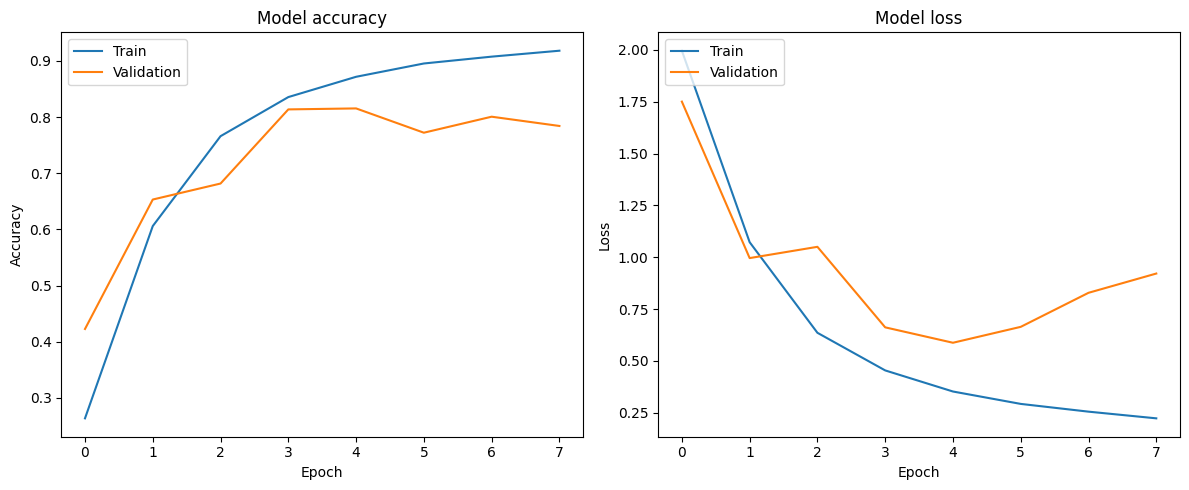

Found 4000 images belonging to 10 classes.
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step

Classification Report:
              precision    recall  f1-score   support

          00       1.00      0.86      0.93       400
          01       1.00      1.00      1.00       400
          02       1.00      0.62      0.76       400
          03       0.99      0.88      0.93       400
          04       0.54      0.71      0.62       400
          05       1.00      0.95      0.97       400
          06       0.92      0.42      0.58       400
          07       0.55      1.00      0.71       400
          08       0.94      0.76      0.84       400
          09       0.73      0.96      0.83       400

    accuracy                           0.82      4000
   macro avg       0.87      0.82      0.82      4000
weighted avg       0.87      0.82      0.82      4000



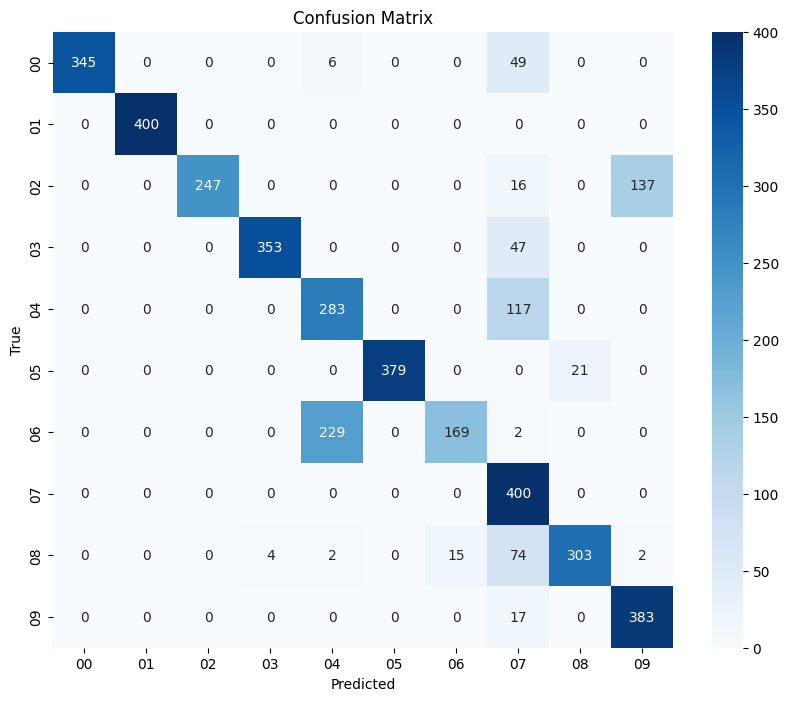

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Dataset configuration
# Dataset: https://www.kaggle.com/gti-upm/leapgestrecog
dataset_path = 'D:\\PYTHON\\internship\\ML-infosys\\leapGestRecog'  # Main dataset directory
img_size = (64, 64)            # Resize images to this size
batch_size = 32                 # Training batch size
epochs = 15                     # Number of training epochs

# Create data generators with augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)  # Using 20% for validation

# Generator for validation (no augmentation)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create training and validation generators
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = val_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

# Get class names and number of classes
class_names = list(train_generator.class_indices.keys())
num_classes = len(class_names)

print(f"Found {num_classes} classes: {class_names}")

# Create CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3)
checkpoint = ModelCheckpoint('best_gesture_model.h5', 
                            monitor='val_accuracy', 
                            save_best_only=True, 
                            mode='max')

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[early_stop, checkpoint])

# Evaluate the model
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Load the best saved model
best_model = tf.keras.models.load_model('best_gesture_model.h5')

# Generate predictions
validation_generator_no_shuffle = val_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False)

y_pred = np.argmax(best_model.predict(validation_generator_no_shuffle), axis=1)
y_true = validation_generator_no_shuffle.classes

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Function to predict a single image
def predict_gesture(image_path, model, img_size=(64, 64)):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=img_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction)
    
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}")
    plt.axis('off')
    plt.show()
    
    return predicted_class, confidence

# Example usage (replace with your image path)
# predict_gesture('test_gesture.jpg', best_model)